# Exploring different aspects of NASA Astronauts

## Contents

<ol>
<li> Import Libraries </li>
<li> Load Dataset </li>
<li> Exploring Dataset </li>
<li> Time spent by Astronauts in Space </li>
<li> Universities of Astronauts </li>
<li> Graduate Major of Astronauts </li>
<li> Women Astronauts </li>
<li> Astronauts served in military </li>
<li> Military Branch of Astronauts </li>
<li> Military Ranks of Astronauts </li> </ol>

## Importing Libraries

In [3]:
### Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [6]:
### Loading the dataset
astronauts = pd.read_csv(r"C:\Users\admin\Desktop\astronaut-yearbook\astronauts.csv")

## Exploring the Dataset

In [7]:

astronauts.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [8]:
astronauts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
Name                   357 non-null object
Year                   330 non-null float64
Group                  330 non-null float64
Status                 357 non-null object
Birth Date             357 non-null object
Birth Place            357 non-null object
Gender                 357 non-null object
Alma Mater             356 non-null object
Undergraduate Major    335 non-null object
Graduate Major         298 non-null object
Military Rank          207 non-null object
Military Branch        211 non-null object
Space Flights          357 non-null int64
Space Flight (hr)      357 non-null int64
Space Walks            357 non-null int64
Space Walks (hr)       357 non-null float64
Missions               334 non-null object
Death Date             52 non-null object
Death Mission          16 non-null object
dtypes: float64(3), int64(3), object(13)
memory usage: 53.1+ KB


In [9]:
astronauts.shape

(357, 19)

In [10]:
### Looking for missing values

astronauts.isnull().sum()
  

Name                     0
Year                    27
Group                   27
Status                   0
Birth Date               0
Birth Place              0
Gender                   0
Alma Mater               1
Undergraduate Major     22
Graduate Major          59
Military Rank          150
Military Branch        146
Space Flights            0
Space Flight (hr)        0
Space Walks              0
Space Walks (hr)         0
Missions                23
Death Date             305
Death Mission          341
dtype: int64

In [11]:
astronauts.dtypes

Name                    object
Year                   float64
Group                  float64
Status                  object
Birth Date              object
Birth Place             object
Gender                  object
Alma Mater              object
Undergraduate Major     object
Graduate Major          object
Military Rank           object
Military Branch         object
Space Flights            int64
Space Flight (hr)        int64
Space Walks              int64
Space Walks (hr)       float64
Missions                object
Death Date              object
Death Mission           object
dtype: object

### Time spent by Astronauts in Space

In [12]:
### Which American astronaut has spent the most time in space?
max_time = astronauts[["Name","Space Flight (hr)"]]
max_time['Space Flight (hr)'].max()



12818

In [13]:
max_time[max_time['Space Flight (hr)'] == 12818].sort_values('Name')

,Name,Space Flight (hr)
346,Jeffrey N. Williams,12818


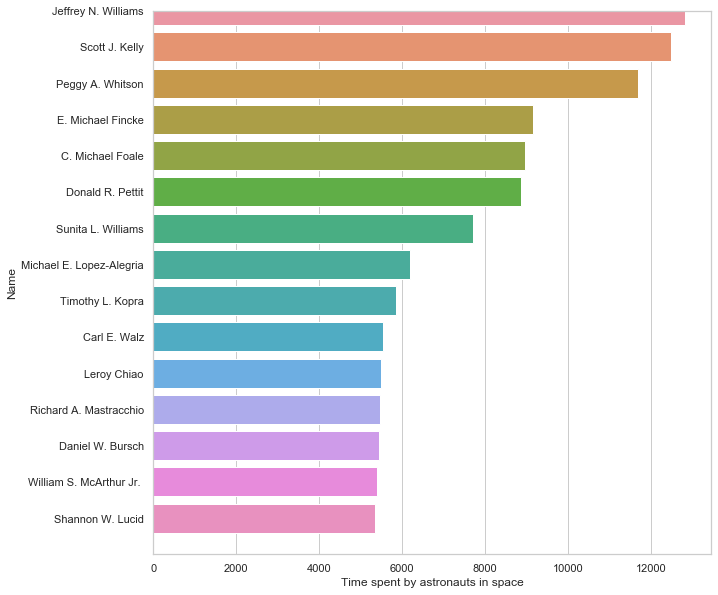

In [14]:
### Visualizing it 
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.set_color_codes("pastel")
sns.barplot(x="Space Flight (hr)", y="Name", data=max_time.nlargest(15,'Space Flight (hr)'))
ax.set(ylim = (15,0), ylabel="Name",
       xlabel="Time spent by astronauts in space")
plt.show()


### Universities of Astronauts

In [15]:
### What university has produced the most astronauts?
uni = astronauts["Alma Mater"].value_counts()
print(uni)

US Naval Academy                                              12
US Naval Academy; US Naval Postgraduate School                11
Purdue University                                              7
US Air Force Academy; Purdue University                        7
MIT                                                            5
                                                              ..
University of Edinburgh; Leeds University                      1
University of California-Berkeley; University of Tennessee     1
University of Illinois; California State University-Fresno     1
University of Michigan                                         1
Texas Technological College                                    1
Name: Alma Mater, Length: 280, dtype: int64


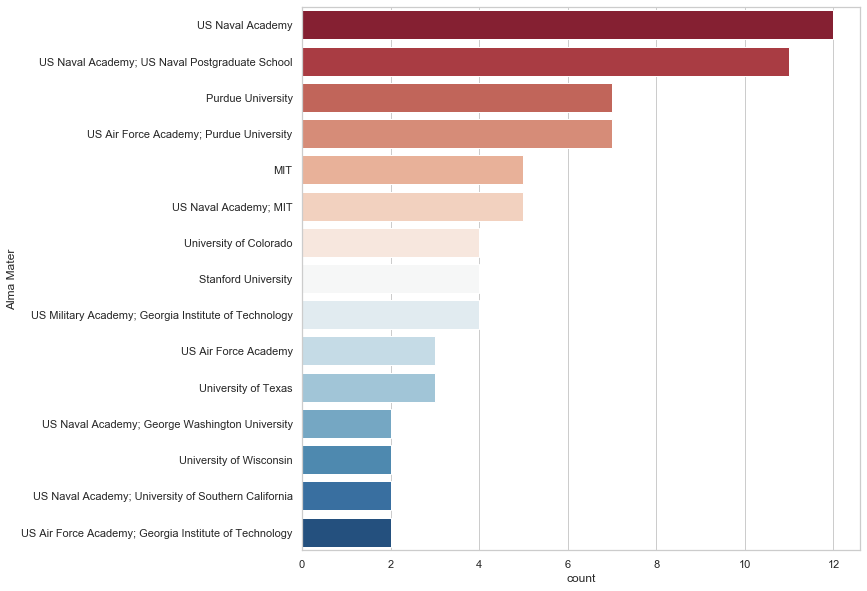

In [16]:
### Visualizing it
plt.figure(figsize=(10,10))
p = sns.countplot(y="Alma Mater", data=astronauts,
                   order=uni.nlargest(15).index,
                   palette='RdBu')
plt.show()





### Graduate Major of Astronauts

In [17]:
### What subject did the most astronauts major in at college?
major = astronauts['Graduate Major'].value_counts()
print(major)

Aeronautical Engineering                                                     27
Aerospace Engineering                                                        21
Medicine                                                                     16
Physics                                                                      15
Mechanical Engineering                                                       13
                                                                             ..
Public Health; Biochemistry; Medicine; Microbiology                           1
International Relations; Aerospace Engineering; Astronautical Engineering     1
Engineering Mechanics                                                         1
Science & Technology Administration                                           1
Geosciences                                                                   1
Name: Graduate Major, Length: 143, dtype: int64


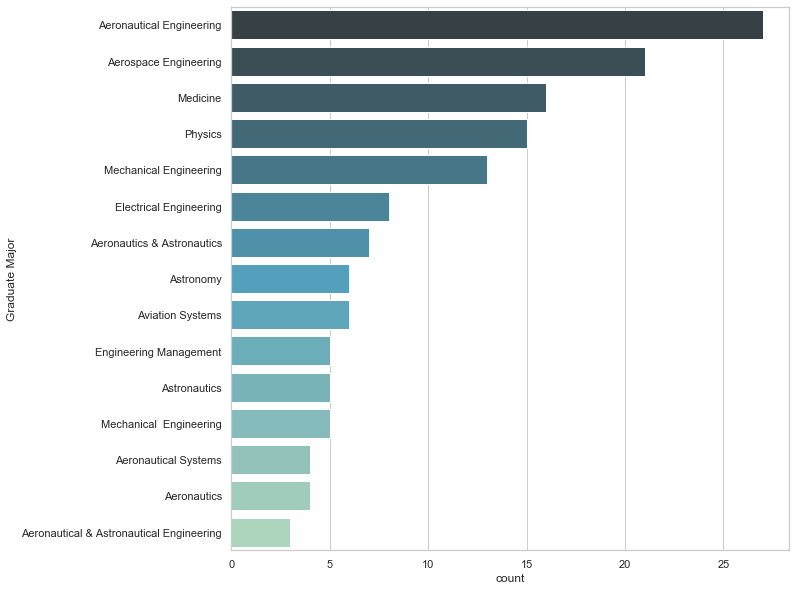

In [18]:
### visualizing it 
plt.figure(figsize=(10,10))
y = sns.countplot(y="Graduate Major", data=astronauts,
                   order=major.nlargest(15).index,
                   palette='GnBu_d')
plt.show()

### Women Astronauts

Male      307
Female     50
Name: Gender, dtype: int64


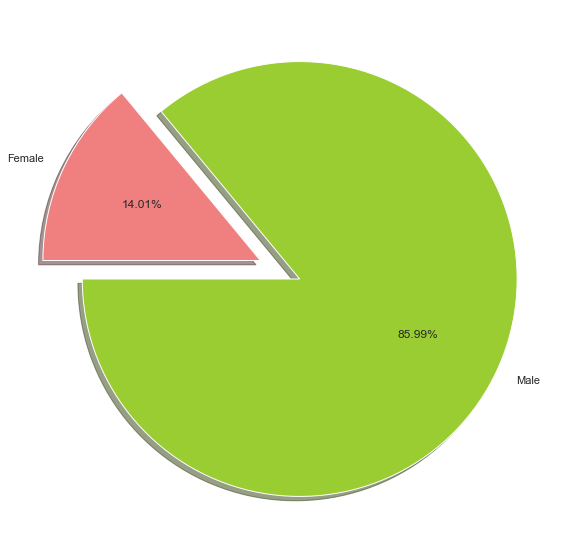

In [29]:
women = astronauts['Gender'].value_counts()
print(women)
colors= ["yellowgreen", "lightcoral"]
plt.figure(figsize=(10,10))
plt.pie(women, labels=women.index, autopct='%2.2f%%', startangle=180, explode = (0, 0.2), shadow = True,colors = colors)

plt.show()

### Astronauts served in  military

In [21]:
### Have most astronauts served in the military? 
astronauts['Military Service'] = astronauts['Military Rank'].apply(lambda x: 0 if type(x) == float else 1)
astronauts['Military Service'].replace([0, 1], ["Didn't join Military", "Joined Military"], inplace=True)
astronauts['Military Service'].value_counts()

Joined Military         207
Didn't join Military    150
Name: Military Service, dtype: int64

Joined Military         207
Didn't join Military    150
Name: Military Service, dtype: int64


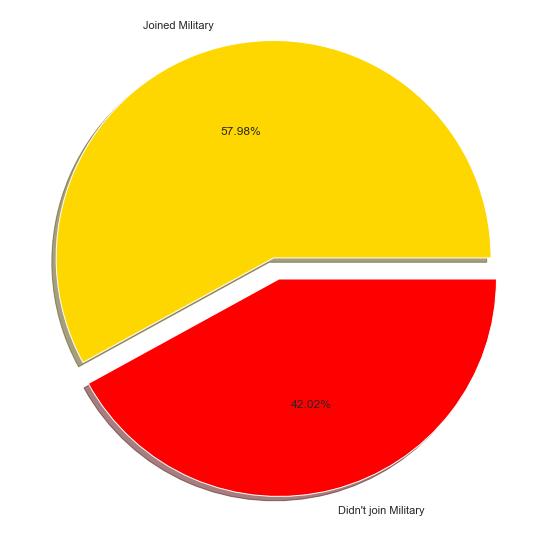

In [26]:
military = astronauts['Military Service'].value_counts()
print(military)
colors = ["gold", "red"]
plt.figure(figsize=(10,10))
plt.pie(military, labels=military.index, autopct='%2.2f%%',explode = (0.1, 0), shadow = True, colors=colors);
plt.show()

### Military Branch of Astronauts

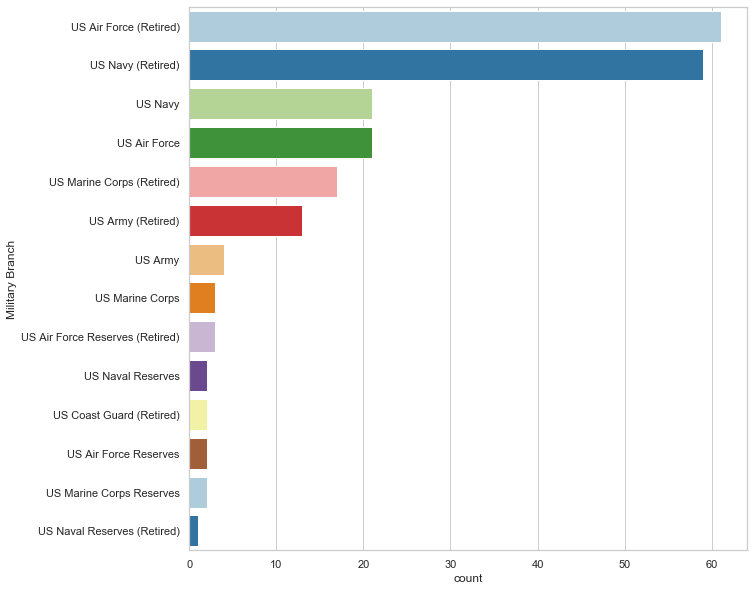

In [30]:
plt.figure(figsize=(10,10))
branch = sns.countplot(y="Military Branch", data=astronauts,
                   order=astronauts['Military Branch'].value_counts().index,
                   palette='Paired')
plt.show()

### Military Ranks of Astronauts

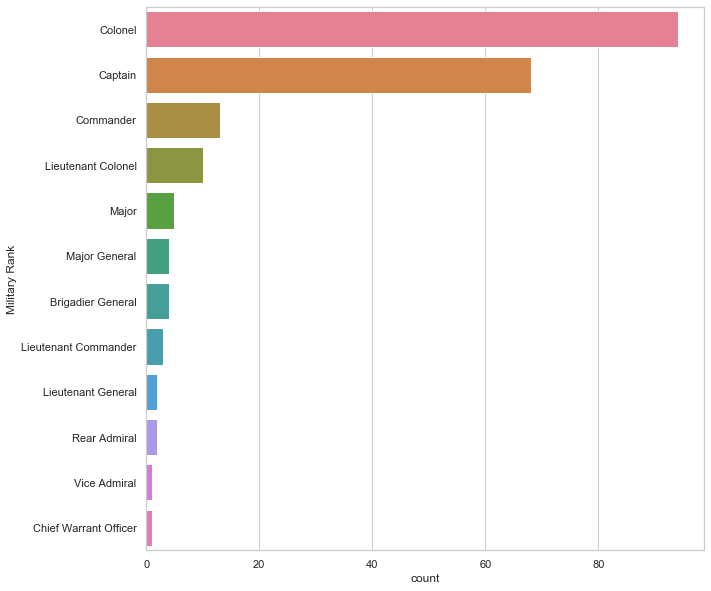

In [32]:
plt.figure(figsize=(10,10))
RankGraph = sns.countplot(y="Military Rank", data=astronauts,
                   order=astronauts['Military Rank'].value_counts().index,
                   palette='husl')
plt.show()